In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [136]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (4).csv


In [137]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [138]:
data = pd.read_csv('Company_Data.csv')
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

#EDA

In [139]:
data.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

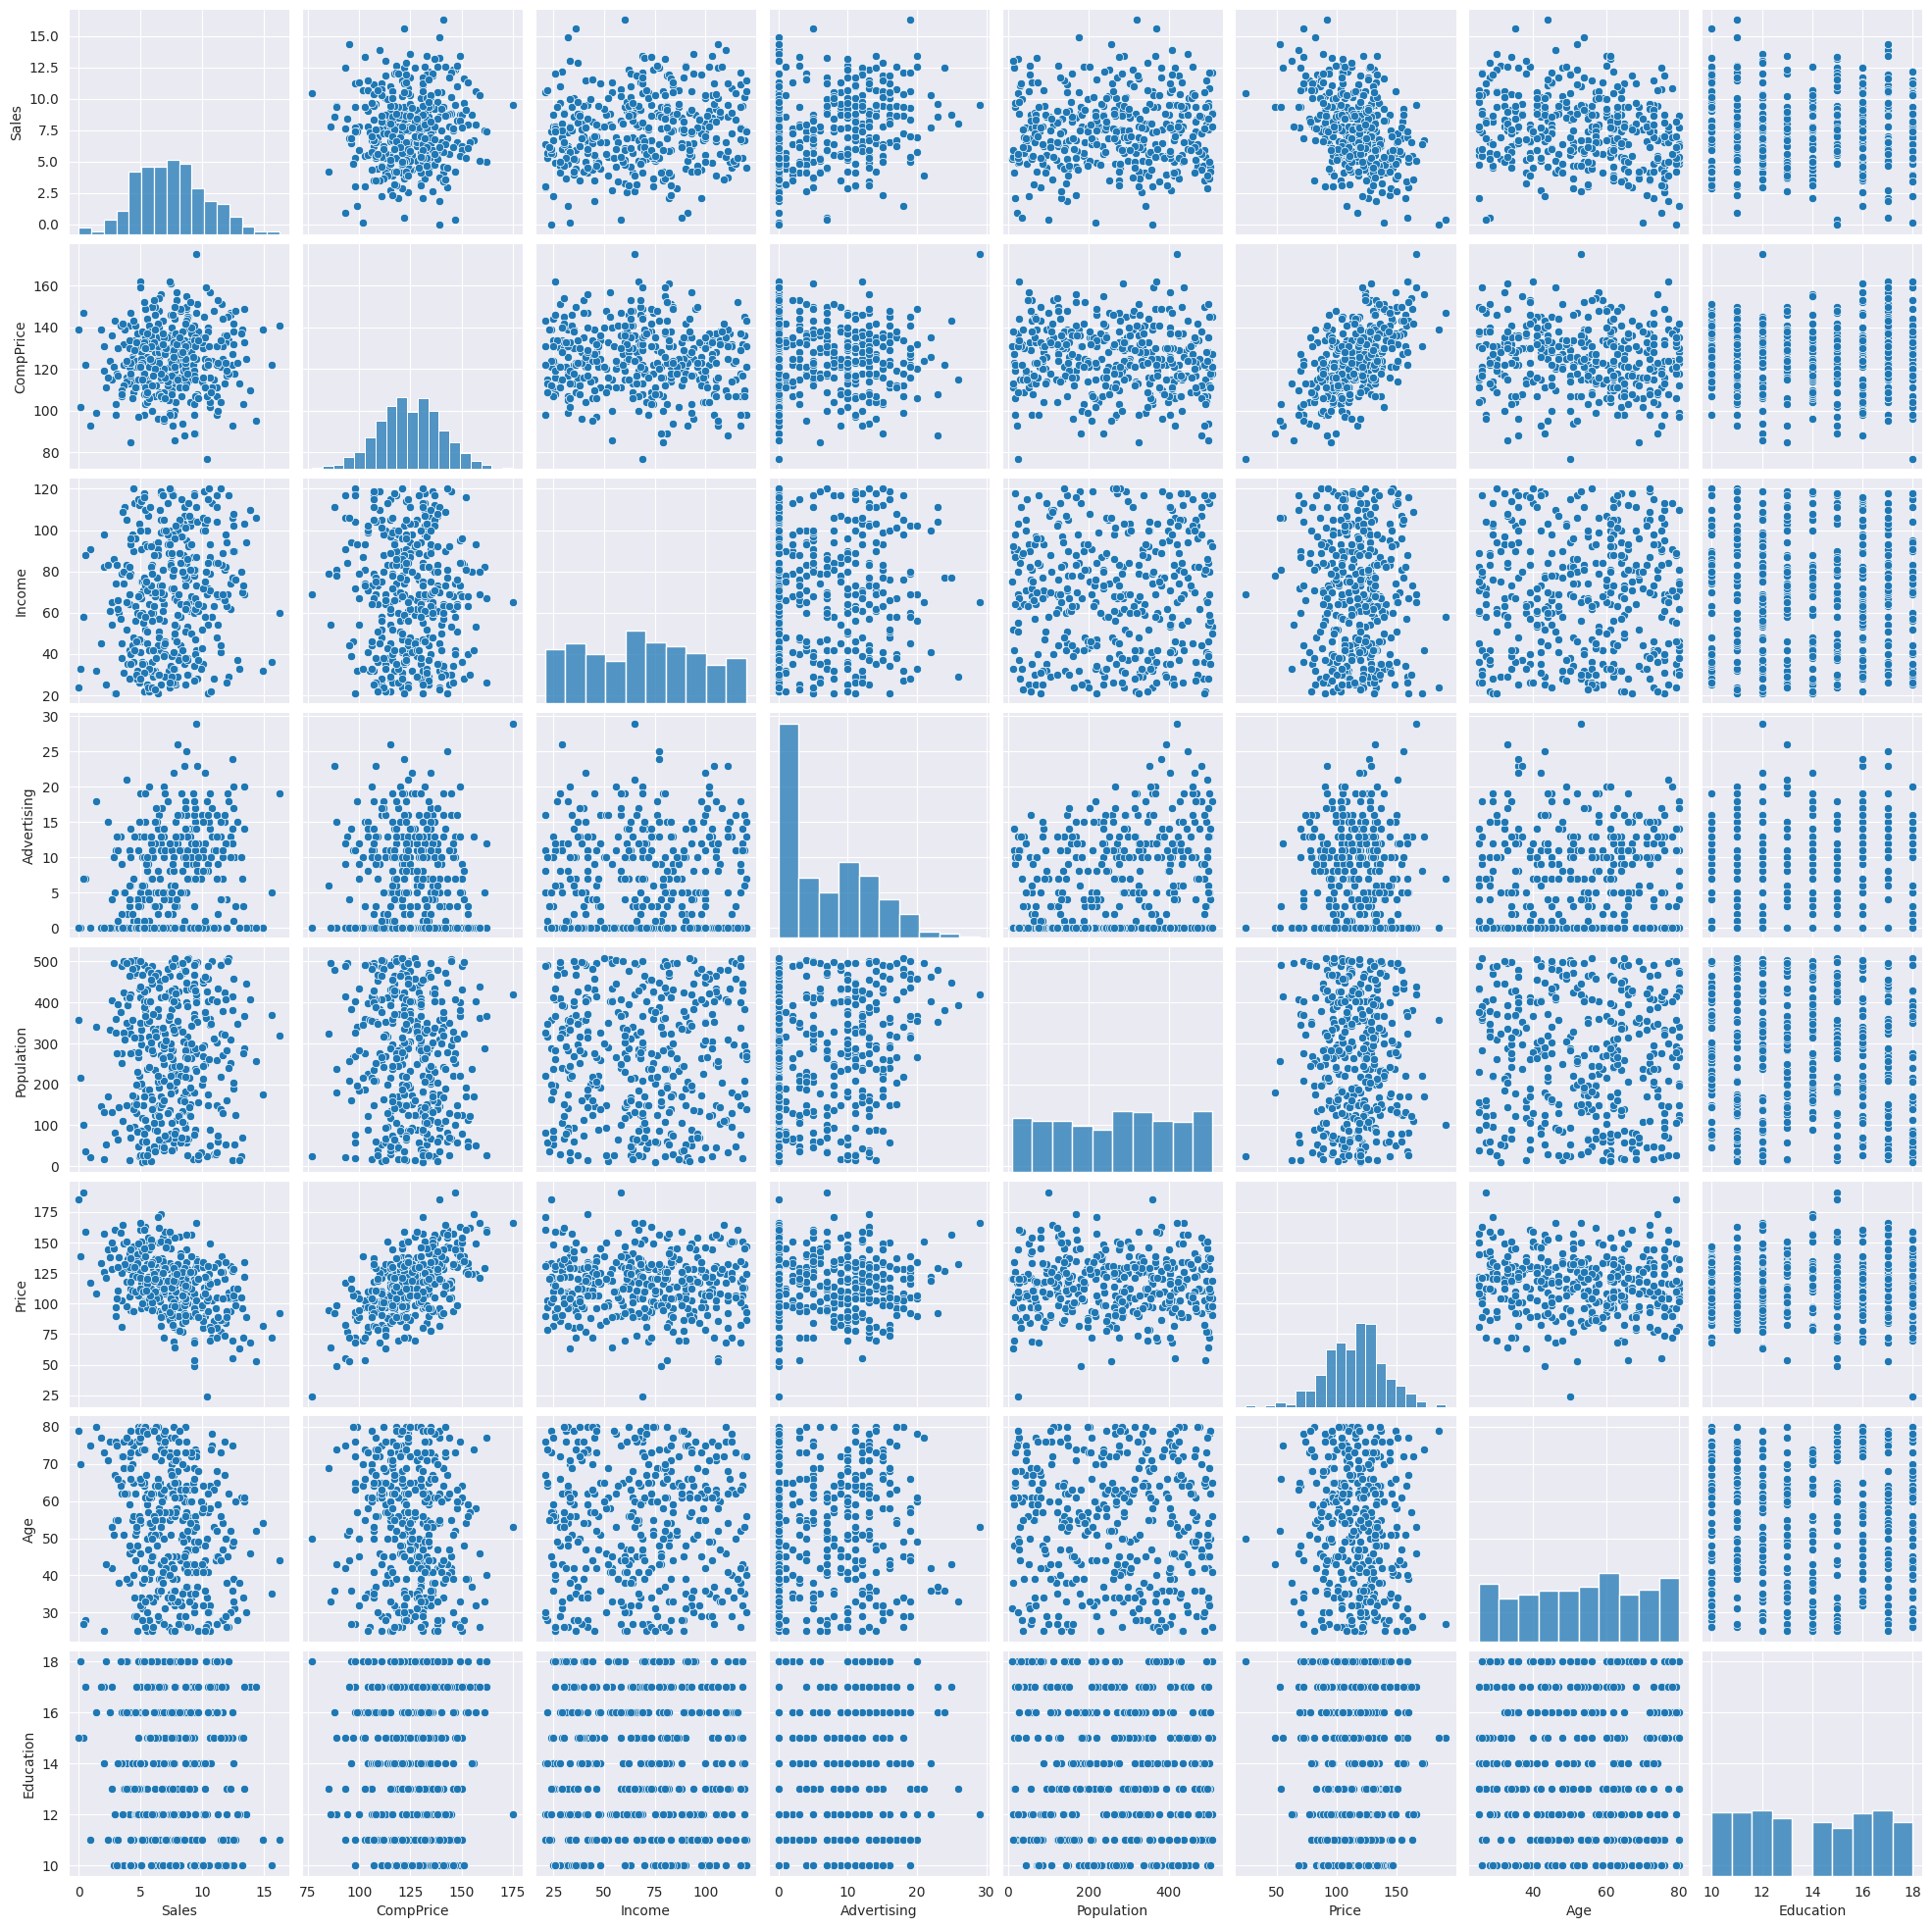

In [140]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [141]:
data1 = data.drop(['Population','Education'],axis=1)
data1.head()

Sales  CompPrice  Income  Advertising  Price ShelveLoc  Age Urban   US
0   9.50        138      73           11    120       Bad   42   Yes  Yes
1  11.22        111      48           16     83      Good   65   Yes  Yes
2  10.06        113      35           10     80    Medium   59   Yes  Yes
3   7.40        117     100            4     97    Medium   55   Yes  Yes
4   4.15        141      64            3    128       Bad   38   Yes   No

In [142]:
le = LabelEncoder()
data1['ShelveLoc'] = le.fit_transform(data1['ShelveLoc'])
data1['Urban'] = le.fit_transform(data1['Urban'])
data1['US'] = le.fit_transform(data1['US'])

In [143]:
data1.head()

Sales  CompPrice  Income  Advertising  Price  ShelveLoc  Age  Urban  US
0   9.50        138      73           11    120          0   42      1   1
1  11.22        111      48           16     83          1   65      1   1
2  10.06        113      35           10     80          2   59      1   1
3   7.40        117     100            4     97          2   55      1   1
4   4.15        141      64            3    128          0   38      1   0

In [144]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Urban        400 non-null    int64  
 8   US           400 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 28.2 KB


In [145]:
data1.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Price          0
ShelveLoc      0
Age            0
Urban          0
US             0
dtype: int64

In [146]:
col = data1.columns
col

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc',
       'Age', 'Urban', 'US'],
      dtype='object')

#Calculating pp-score

In [147]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
import ppscore as pps
pps.matrix(data1)

x            y   ppscore            case  is_valid_score  \
0         Sales        Sales  1.000000  predict_itself            True   
1         Sales    CompPrice  0.000000      regression            True   
2         Sales       Income  0.000000      regression            True   
3         Sales  Advertising  0.000000      regression            True   
4         Sales        Price  0.000000      regression            True   
5         Sales    ShelveLoc  0.000000      regression            True   
6         Sales          Age  0.000000      regression            True   
7         Sales        Urban  0.000000      regression            True   
8         Sales           US  0.000000      regression            True   
9     CompPrice        Sales  0.000000      regression            True   
10    CompPrice    CompPrice  1.000000  predict_itself            True   
11    CompPrice       Income  0.000000      regression            True   
12    CompPrice  Advertising  0.000000      regression            True   
13    CompPrice        Price  0.050512      regression            True   
14    CompPrice    ShelveLoc  0.000000      regression            True   
15    CompPrice          Age  0.000000      regression            True   
16    CompPrice        Urban  0.000000      regression            True   
17    CompPrice           US  0.000000      regression            True   
18       Income        Sales  0.000000      regression            True   
19       Income    CompPrice  0.000000      regression            True   
20       Income       Income  1.000000  predict_itself            True   
21       Income  Advertising  0.000000      regression            True   
22       Income        Price  0.000000      regression            True   
23       Income    ShelveLoc  0.000000      regression            True   
24       Income          Age  0.000000      regression            True   
25       Income        Urban  0.000000      regression            True   
26       Income           US  0.000000      regression            True   
27  Advertising        Sales  0.000000      regression            True   
28  Advertising    CompPrice  0.000000      regression            True   
29  Advertising       Income  0.000000      regression            True   
30  Advertising  Advertising  1.000000  predict_itself            True   
31  Advertising        Price  0.000000      regression            True   
32  Advertising    ShelveLoc  0.000000      regression            True   
33  Advertising          Age  0.000000      regression            True   
34  Advertising        Urban  0.000000      regression            True   
35  Advertising           US  0.560806      regression            True   
36        Price        Sales  0.000000      regression            True   
37        Price    CompPrice  0.073580      regression            True   
38        Price       Income  0.000000      regression            True   
39        Price  Advertising  0.002103      regression            True   
40        Price        Price  1.000000  predict_itself            True   
41        Price    ShelveLoc  0.000000      regression            True   
42        Price          Age  0.000000      regression            True   
43        Price        Urban  0.000000      regression            True   
44        Price           US  0.000000      regression            True   
45    ShelveLoc        Sales  0.150290      regression            True   
46    ShelveLoc    CompPrice  0.000000      regression            True   
47    ShelveLoc       Income  0.000000      regression            True   
48    ShelveLoc  Advertising  0.000000      regression            True   
49    ShelveLoc        Price  0.000000      regression            True   
50    ShelveLoc    ShelveLoc  1.000000  predict_itself            True   
51    ShelveLoc          Age  0.000000      regression            True   
52    ShelveLoc        Urban  0.000000      regression            True   
53    ShelveLoc   

In [149]:
pps.score(data1,'Sales','Price')

{'x': 'Sales',
 'y': 'Price',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 18.72,
 'model_score': 23.392916666666665,
 'model': DecisionTreeRegressor()}

As the pp-score suggests the Decision Tree Regressor will fit the model best.

#Building the model.

In [150]:
x = data1.iloc[:,1:]
y = data1['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [151]:
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

[Text(0.4375, 0.9166666666666666, 'x[4] <= 0.5\nsquared_error = 7.974\nsamples = 320\nvalue = 7.574'),
 Text(0.18229166666666666, 0.75, 'x[3] <= 93.0\nsquared_error = 5.927\nsamples = 83\nvalue = 5.589'),
 Text(0.0625, 0.5833333333333334, 'x[1] <= 23.0\nsquared_error = 3.881\nsamples = 16\nvalue = 8.276'),
 Text(0.041666666666666664, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 3.02'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[0] <= 123.5\nsquared_error = 2.175\nsamples = 15\nvalue = 8.626'),
 Text(0.041666666666666664, 0.25, 'x[1] <= 49.0\nsquared_error = 0.593\nsamples = 9\nvalue = 7.883'),
 Text(0.020833333333333332, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.25, 'x[0] <= 132.5\nsquared_error = 2.48\nsamples = 6\nvalue = 9.74'),
 Text(0.10416666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14583333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.3020833333333333, 0.58333333

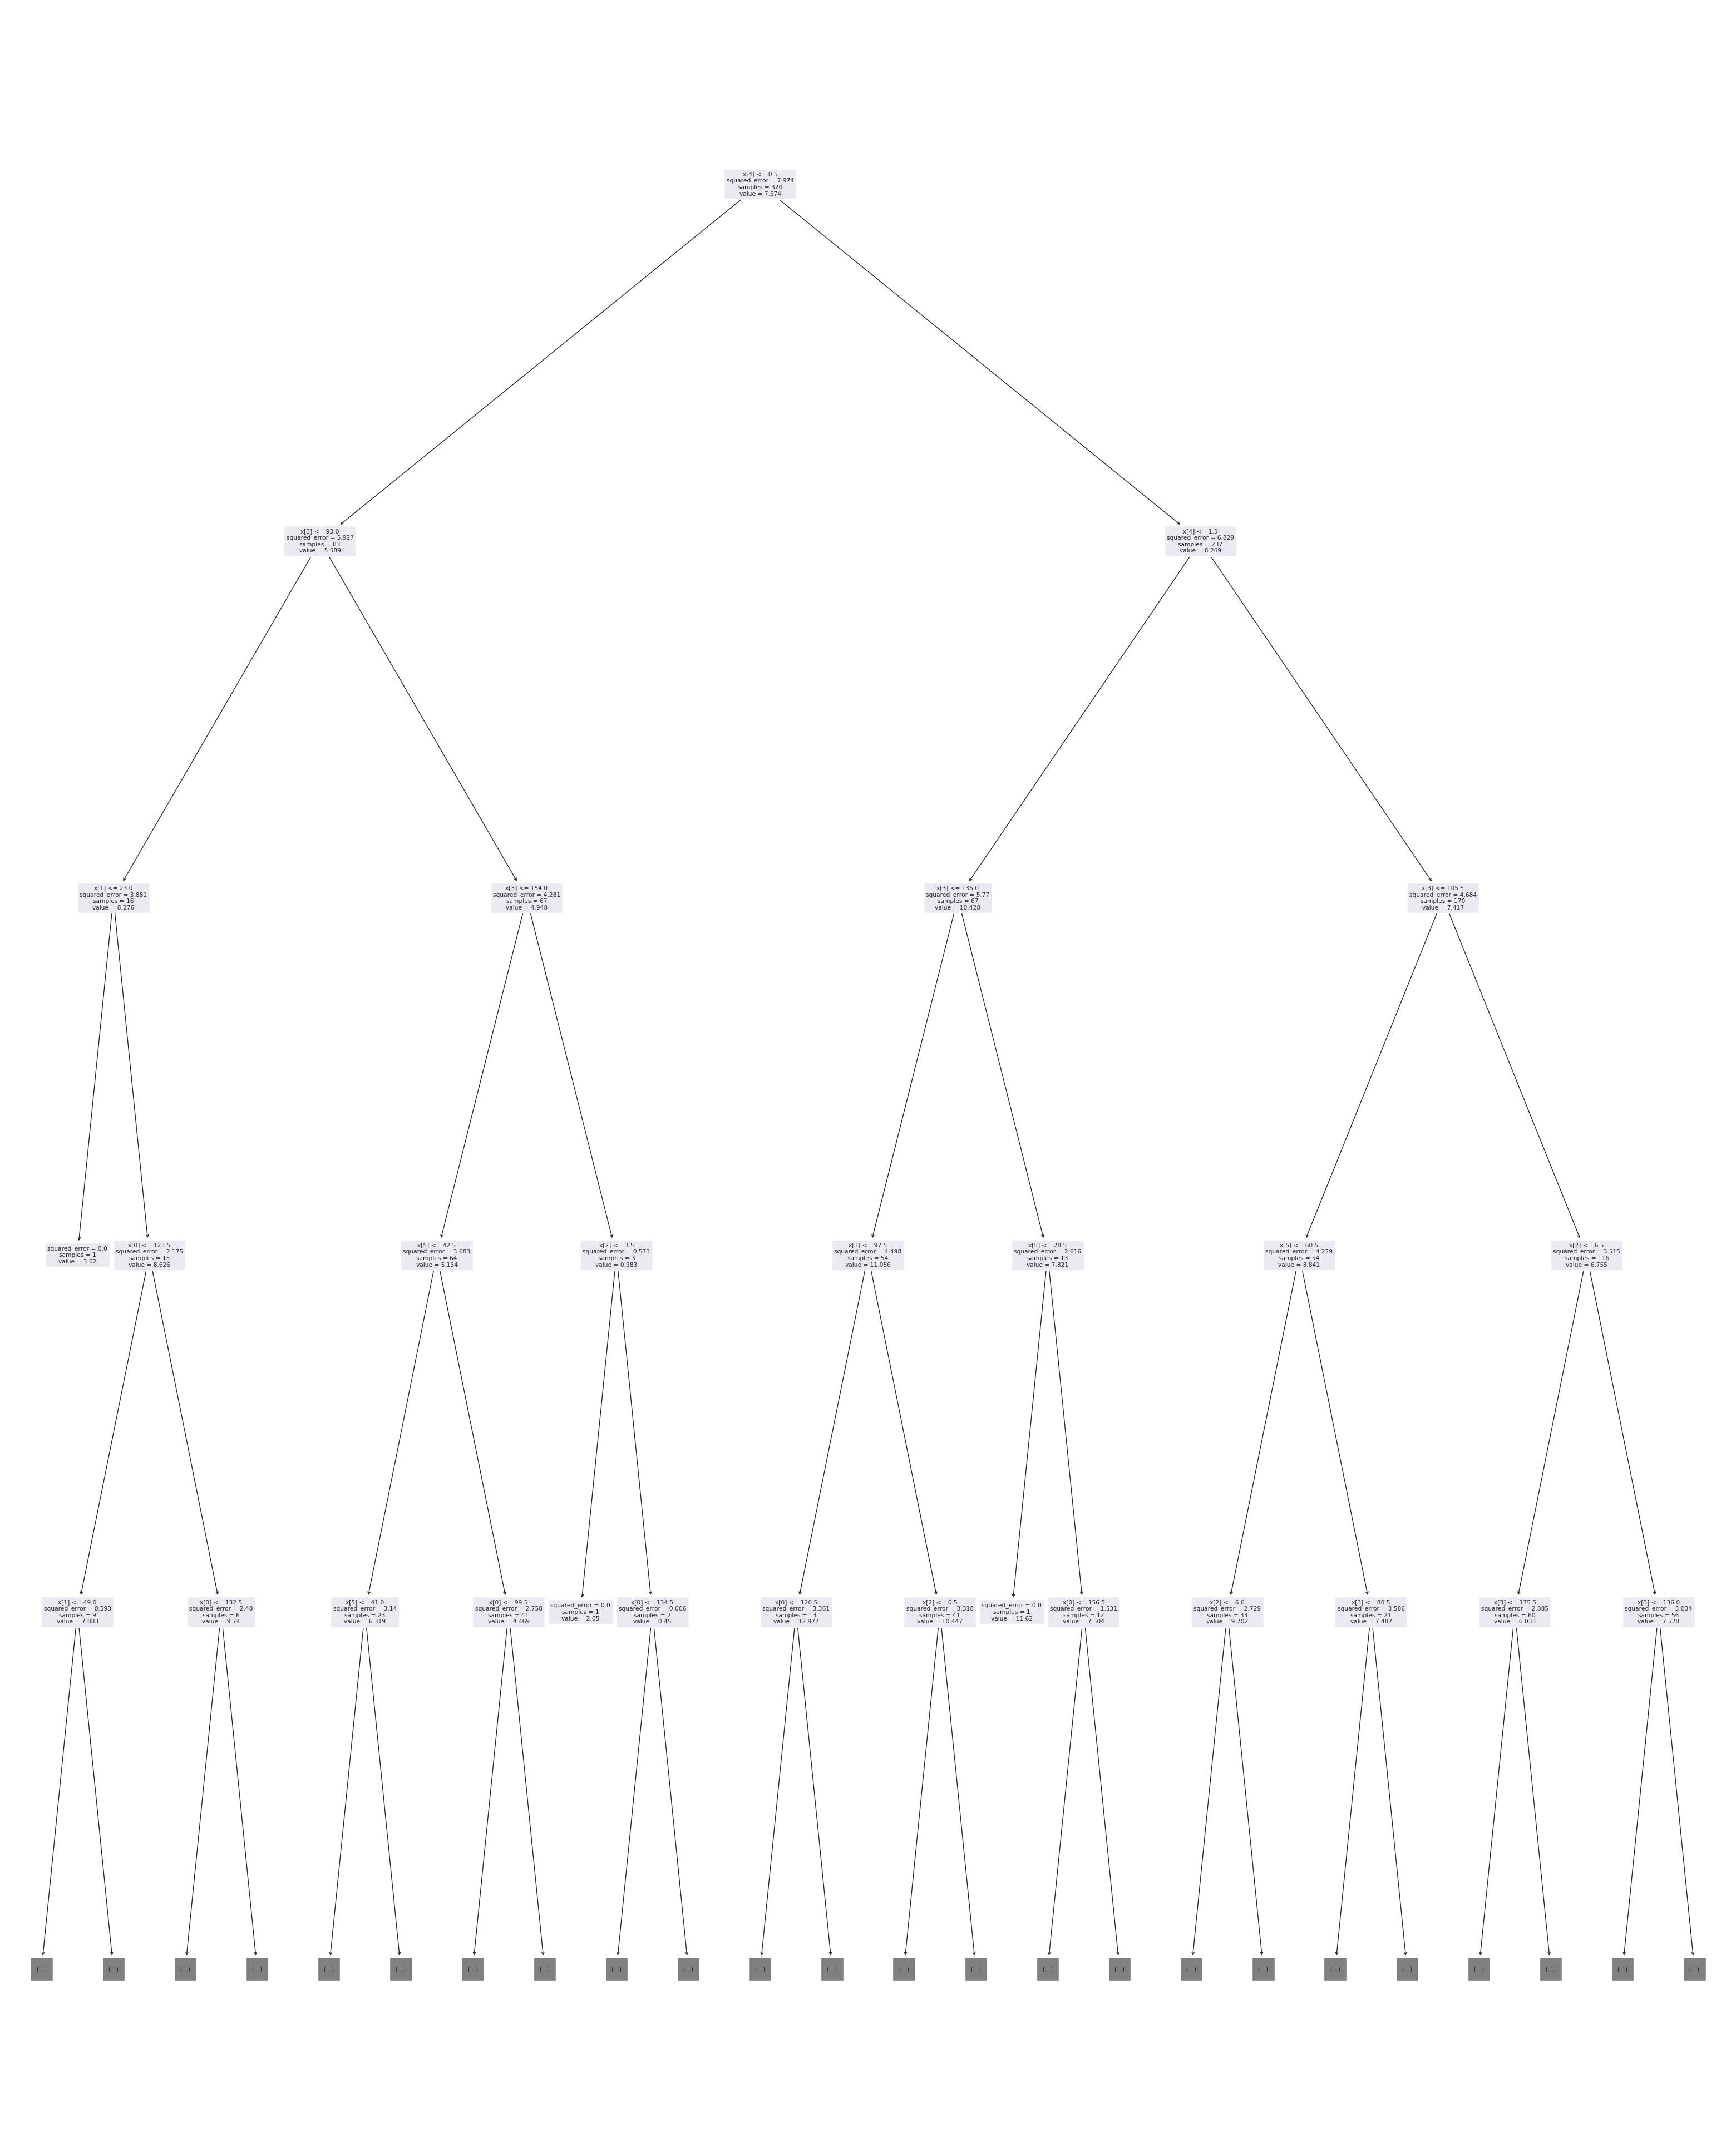

In [159]:
fig = plt.figure(figsize=[40,50])
tree.plot_tree(model,max_depth = 4)

In [160]:
fn = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc','Age', 'Urban', 'US']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               filled = True,max_depth=4);

In [161]:
preds=model.predict(x_test)

In [162]:
y_test.head()

132    9.54
390    5.47
310    9.53
3      7.40
248    5.36
Name: Sales, dtype: float64

In [163]:
y_test1 = y_test.to_numpy()
y_test1 = np.reshape(y_test1,80)
y_test1

array([ 9.54,  5.47,  9.53,  7.4 ,  5.36,  4.2 ,  9.58, 10.43,  9.08,
       11.82,  4.81,  4.67,  7.53,  6.64, 10.51,  3.91,  6.44,  7.57,
        4.69,  5.3 ,  9.64, 10.48, 10.31,  9.03,  4.12,  4.9 ,  8.33,
        4.15, 11.27, 13.14, 13.91,  7.36, 11.48,  7.23,  3.58, 11.91,
        9.16,  6.53,  6.03,  7.22,  6.71,  3.9 ,  2.93,  8.85,  5.3 ,
        6.9 ,  7.62,  6.63,  6.52,  7.49,  0.16,  7.9 ,  9.45,  7.56,
        5.4 , 10.71, 10.44,  6.71,  3.47,  1.82,  3.98,  3.45, 13.36,
        7.3 ,  4.42,  7.64,  6.67,  3.63,  6.1 , 10.96,  7.7 ,  8.64,
        7.38,  7.54,  8.07,  8.68,  2.52,  5.87,  4.9 ,  5.42])

In [164]:
#np.mean(preds==y_test1)
model.score(x_test,y_test)

0.4867666453421141